# モデル選択と正則化

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 汎化と過学習

ここでは、以下の`X`を説明変数、`Y`を目的変数として多項式にフィッティングすることを考える。

In [2]:
X = np.array([ 0.  ,  0.16,  0.22,  0.34,  0.44,  0.5 ,  0.67,  0.73,  0.9 ,  1.  ])
Y = np.array([-0.06,  0.94,  0.97,  0.85,  0.25,  0.09, -0.9 , -0.93, -0.53,  0.08])

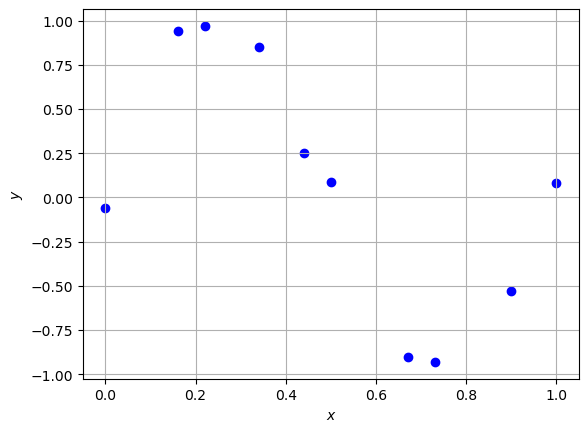

In [3]:
fig, ax = plt.subplots(dpi=100)
ax.scatter(X, Y, marker='o', color='b')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid()

３次関数でデータ`X`, `Y`をフィッティングしてみる。ここでは、多項式フィッティングを簡単に実現する[np.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)関数と[np.polyval](https://numpy.org/doc/stable/reference/generated/numpy.polyval.html)関数を用いる。

In [4]:
W3 = np.polyfit(X, Y, 3)
W3

array([ 21.81795457, -32.58352732,  10.97825774,  -0.06314113])

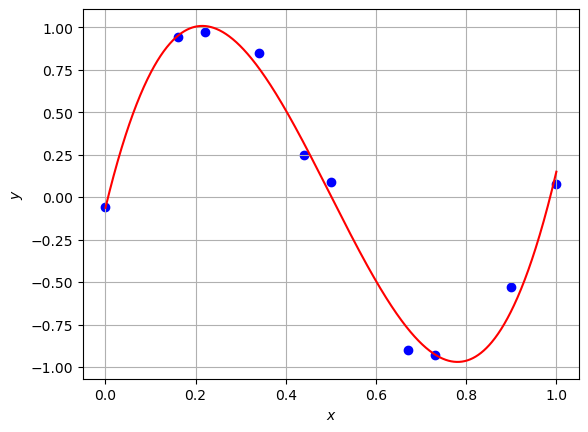

In [5]:
x = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(dpi=100)
ax.scatter(X, Y, marker='o', color='b')
ax.plot(x, np.polyval(W3, x), 'r')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid()

学習された３次関数のモデルの平均二乗残差は、おおよそ$6.17 \times 10^{-3}$である。

In [6]:
np.mean((Y - np.polyval(W3, X)) ** 2)

0.0061683861506209425

３次関数でもよくデータを表現できているように見えるが、さらに近似の精度を上げるため、多項式の次数を上げてみたい。例えば、９次関数でデータ`X`, `Y`をフィッティングすると、以下のようになる。

In [7]:
W9 = np.polyfit(X, Y, 9)
W9

array([ 7.92106359e+04, -3.56090735e+05,  6.74161690e+05, -6.99307115e+05,
        4.32757050e+05, -1.62771499e+05,  3.61547202e+04, -4.33492219e+03,
        2.20316075e+02, -6.00000000e-02])

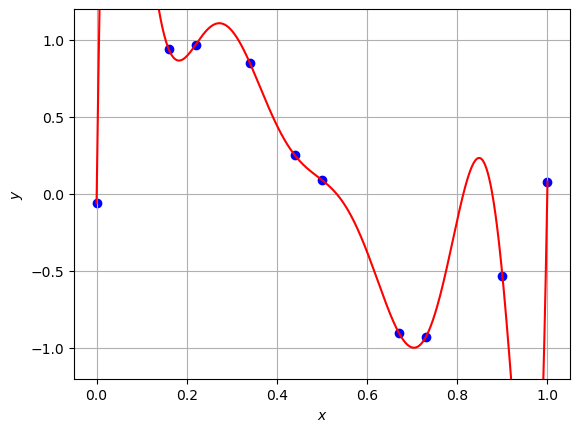

In [8]:
x = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(dpi=100)
ax.scatter(X, Y, marker='o', color='b')
ax.plot(x, np.polyval(W9, x), 'r')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_ylim(-1.2, 1.2)
ax.grid()

`X`と`Y`の全ての点を絶妙に通過する曲線を描くことができたが、曲線がグラフの中に収まりきらなくなってしまった。そこで、$0 \leq x \leq 1$の範囲で曲線の全体が表示されるようにグラフを描きなおす。

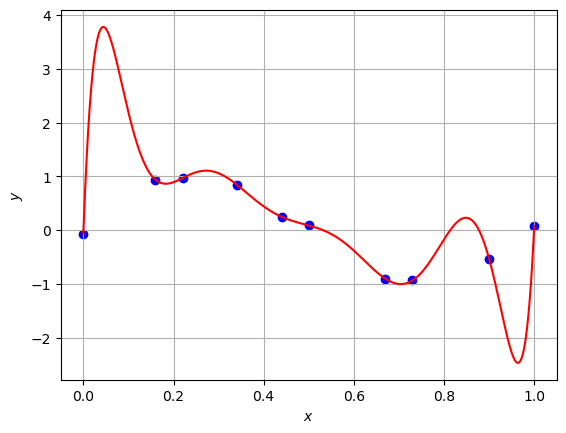

In [9]:
x = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(dpi=100)
ax.scatter(X, Y, marker='o', color='b')
ax.plot(x, np.polyval(W9, x), 'r')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid()

与えたデータの目的変数`Y`の最大値は$0.97$、最小値は$-0.93$であるが、求めた９次多項式の出力はその範囲を逸脱している。とはいえ、学習された９次関数のモデルの平均二乗残差を求めると、おおよそ$2.03 \times 10^{-20}$であるから、３次関数のモデルの平均二乗残差（$6.17 \times 10^{-3}$）よりも小さい。つまり、３次関数のモデルよりも９次関数のモデルの方が、与えられたデータをよく再現できているのである。

In [10]:
np.mean((Y - np.polyval(W9, X)) ** 2)

8.772287011075695e-21

さて、データ`X`, `Y`を表現するにあたって、３次関数によるフィッティングと９次関数によるフィッティングのどちらが良いだろうか。回帰分析を行う目的は、データから説明変数と目的変数を対応付けるメカニズムを理解したり、訓練データには無かった新しい事例に対して出力を予測することであった。モデルが訓練データにはない未知の事例も普遍的に予測できることを**汎化**と呼ぶ。教師あり学習の目的は、汎化能力の高いモデルを学習することである。

もし、データ`X`, `Y`が９次関数から生成されており、かつその正確な値が`X`と`Y`に記録されていることを事前に知っているのであれば、９次関数によるフィッティングの方が適切と言える。しかし、実際にデータ分析を行うときは、目的変数と説明変数を関連付けるメカニズム（関数の形）が分からないことの方が多い（冒頭で用いた最高気温とアイスクリーム・シャーベットの支出額の関係を思い出して欲しい）。また、観測された説明変数や目的変数には、様々な要因により外乱（ノイズ）が混入することが珍しくない。実際、今回の例で用いている`X`と`Y`は正弦関数$\sin$の入出力にノイズを加えたものであり、３次関数でも９次関数でもない。ということになると、３次関数によるフィッティングの方が真のデータをよく反映しており、汎化能力が高いと言えるのかもしれない。

この状況をグラフとして可視化した。黒の実線は$y=\sin(2\pi x)$の正弦曲線である。正弦曲線上で10点をランダムに選び、$x$軸方向と$y$軸方向にノイズを加えたものが、青い点で示されたデータ`X`と`Y`である。このデータに対して、３次関数をフィッティングしたものが青色の点線、９次関数をフィッティングしたものが橙色の破線である。データ`X`と`Y`が正弦関数から作られていることを知っているのであれば、３次関数のモデルのほうが汎化性能が高いことになる。９次関数のフィッティング結果のように、データを厳密に再現しようとしすぎた結果、汎化性能が低いモデルが学習されてしまう状況を**過学習**（過剰適合、オーバーフィッティング）と呼ぶ。

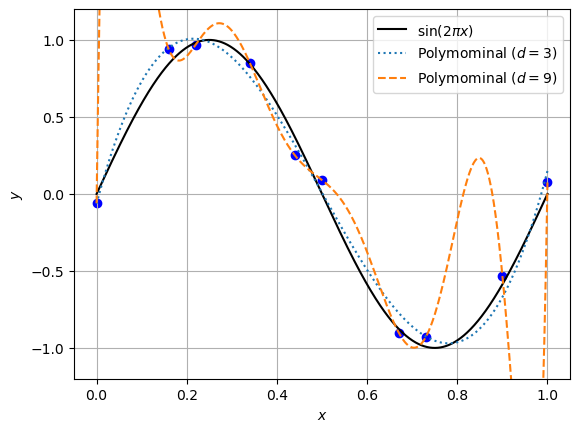

In [11]:
W3 = np.polyfit(X, Y, 3)
W9 = np.polyfit(X, Y, 9)

x = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(dpi=100)
ax.scatter(X, Y, marker='o', color='b')
ax.plot(x, np.sin(2 * np.pi * x), 'black', label=r'$\sin(2\pi x)$', linestyle="solid")
ax.plot(x, np.polyval(W3, x), label=r'Polymominal ($d=3$)', linestyle="dotted")
ax.plot(x, np.polyval(W9, x), label=r'Polymominal ($d=9$)', linestyle="dashed")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_ylim(-1.2, 1.2)
plt.legend(loc='upper right')
fig.savefig('overfitting.png')
ax.grid()

## モデル選択

データ`X`, `Y`に対して汎化性能の高いモデルを獲得するにはどのようにすればよいか。素朴なアイディアとして、`X`と`Y`のプロットを見ながら多項式の次数$d$を（ひらめきで）調整することを思いつくかもしれない。例えば、「データ`X`と`Y`をプロットした形状から、３次関数にフィッティングするのが適切かもしれない」といった具合である。

ただ、３次の多項式が本当に適切なのか疑問が残る。９次関数でフィッティングするのは行き過ぎだとしても、４次関数から８次関数の中に３次関数よりも適切なものがあるかもしれない。ここで、次元数$d$は多項式モデルのパラメータではあるが、学習によって（目的関数の最小化によって）求めるものではなく、学習に先立って与えておくものであるから、**ハイパーパラメータ**（hypterparameter）と呼ばれる。ハイパーパラメータを変えることによって、同じ学習データから異なるモデルが得られる。今回の例では、次元数を$d=3, 4, \dots, 9$と変えながらモデルを学習することで7個のモデルが得られる。さて、この中で汎化性能の高いモデルを選択するにはどのようにすればよいか？

３次関数と９次関数の学習データ上の平均二乗残差（MSR）を比較したとき、９次関数の平均二乗残差の方が小さくなった。一般に、学習データ$\mathcal{D}$上のモデルの損失$\hat{L}_\mathcal{D}(\pmb{W})$は、モデルを複雑にする（例えば、多項式の次数を高くする）ことによって低下するため、汎化性能を測定する指標として用いることができない。

モデルの汎化性能を定量化する基本的なアイディアは、訓練データとは異なるデータを準備してモデルの性能を評価することである。訓練データで学習したモデルの汎化性能を測定するためのデータは、**評価データ**（evaluation data）や**テストデータ**（test data）と呼ばれる。

訓練データと評価データを分ける理由を端的に説明する例として、学校の期末試験の話をしてみたい。ある先生は学生のモチベーションを高めるために、期末試験対策の演習問題プリント（訓練データ）を学生に配布している。演習問題は修得してほしい内容の典型例を示すものであり、学生はその問題に取り組むことで、より一般的な問題の解き方を身に付けていく（汎化）。ただ、期末試験では、学生が問題の解決法を修得したのか、問題の答えを丸覚え（過学習）したのか区別する必要がある。したがって、期末試験の問題（評価データ）は演習プリント（訓練データ）のものと異なるのが通常である。

さて、汎化性能の高いモデルを選択する場合は、評価データの他に**検証データ**（validation data）を用意する。検証データと評価データの内容には本質的な差はなく、検証用データはモデルの選択（ハイパーパラメータを決定など）に用いられるのに対し、評価データはモデルの最終的な性能を評価するために用いられる。なお、訓練データに含まれる事例が検証データや評価データに混じってしまうと、モデルの汎化性能を測定したことにならないので、訓練データに含まれる事例が検証データや評価データに混じってはいけない。データ分析のコンペティションなどでは、訓練データ、検証データ、評価データが予め用意されていることがあるが、これらが分離されていないときは、自分でデータを適当な比率（例えば8:1:1など）で訓練データ、検証データ、評価データに分けておく。なお、検証データは**開発データ**（development data）と呼ばれることもある。

![model-selection](fig/model-selection.gif "検証データを利用したモデル選択")

この図では、ハイパーパラメータを変えるなどして４つの異なるモデルを学習し、それぞれ検証データ上で性能（例えばMSRやエラー率）を測定したところ、2番目のモデルの性能が良かったので、このモデルの汎化性能が最も高いと判断している。そこで、この2番目のモデルを採用し、その最終的な性能を評価データ上で測定している。

さて、以下の`X_valid`と`Y_valid`を検証用データとして用いてモデルを選択する例を説明する。

In [12]:
X_valid = np.array([ 0.05,  0.08,  0.16,  0.28,  0.44,  0.47,  0.55,  0.63,  0.84,   0.99])
Y_valid = np.array([ 0.35,  0.58,  0.87,  0.98,  0.45,  0.01, -0.36, -0.73, -0.85,  -0.06])

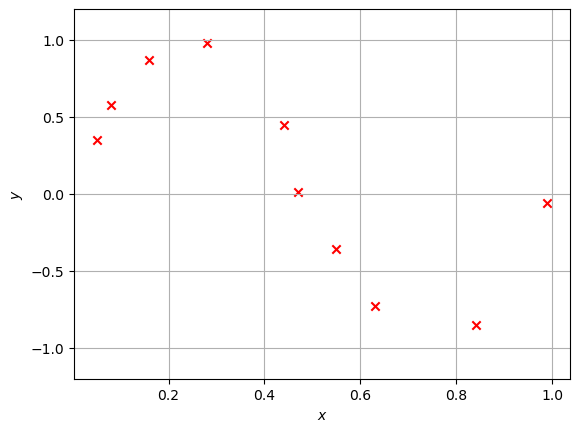

In [13]:
fig, ax = plt.subplots(dpi=100)
ax.scatter(X_valid, Y_valid, marker='x', color='r')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_ylim(-1.2, 1.2)
ax.grid()

以下のプログラムは、次元数$d$を$1$から$9$まで変化させて多項式フィッティングを行ったとき、訓練データ上のMSRと検証データ上のMSRを計測・表示する。この結果によると、訓練データ上では次元数$d$を増やすことでMSRを下げることができ、$d=9$ではMSRがほぼ$0$になっていることが分かる。一方で、検証データ上のMSRは$d=9$の時が明らかに悪く、深刻な過学習が起こっていることを示唆している。また、検証データ上のMSRは$d=5$で最小（MSR=0.0052849468）となることが分かる。この実験結果から$d=5$のモデルが最も高い汎化性能を示すと判断し、多項式フィッティングの次元数は$d=5$が最適と決定するのが、検証データによるハイパーパラメータの調整（チューニング）である。

In [14]:
for d in range(1, 10):
    W = np.polyfit(X, Y, d)
    Y_hat = np.polyval(W, X)
    Y_valid_hat = np.polyval(W, X_valid)
    e_train = np.mean((Y_hat - Y) ** 2)
    e_valid = np.mean((Y_valid_hat - Y_valid) ** 2)
    print(f'd = {d}: MSR = {e_train:.10f} (training), {e_valid:.10f} (validation)')

d = 1: MSR = 0.2911223347 (training), 0.1731786835 (validation)
d = 2: MSR = 0.2911017232 (training), 0.1724489756 (validation)
d = 3: MSR = 0.0061683862 (training), 0.0089782205 (validation)
d = 4: MSR = 0.0059072699 (training), 0.0086822313 (validation)
d = 5: MSR = 0.0027495672 (training), 0.0052849468 (validation)
d = 6: MSR = 0.0025021465 (training), 0.0060748073 (validation)
d = 7: MSR = 0.0024176615 (training), 0.0083442287 (validation)
d = 8: MSR = 0.0023835792 (training), 0.0061707210 (validation)
d = 9: MSR = 0.0000000000 (training), 1.9813186075 (validation)


確認のため、5次関数と3次関数でフィッティングしたときの結果を以下に示す。訓練データ、検証データのいずれにおいても、3次関数よりも5次関数によるフィッティングの方が良さそうであることが分かる。

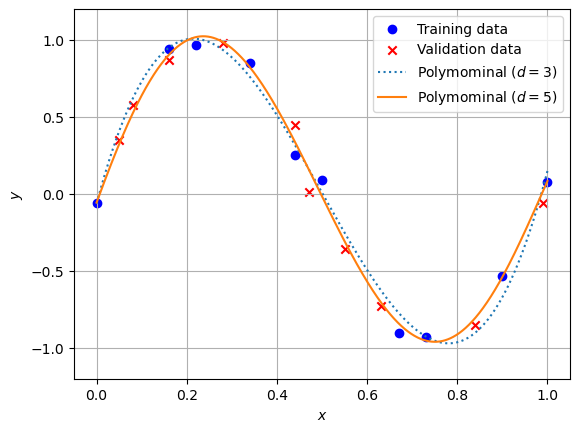

In [15]:
W3 = np.polyfit(X, Y, 3)
W5 = np.polyfit(X, Y, 5)
x = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(dpi=100)
ax.scatter(X, Y, marker='o', label=r'Training data', color='b')
ax.scatter(X_valid, Y_valid, label=r'Validation data', marker='x', color='r')
ax.plot(x, np.polyval(W3, x), label=r'Polymominal ($d=3$)', linestyle="dotted")
ax.plot(x, np.polyval(W5, x), label=r'Polymominal ($d=5$)', linestyle="solid")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_ylim(-1.2, 1.2)
plt.legend()
ax.grid()

## $L_2$正則化（リッジ回帰）

ところで、モデルの過学習が起こるとき、パラメータはどのような値を取るのだろうか。以下のプログラムは、次元数$d$を$1$から$9$まで変化させて多項式フィッティングを行ったとき、実際に求められた重みベクトル$\pmb{w}$の値を表示するものである。

In [16]:
np.set_printoptions(precision=1, linewidth=180)
for d in range(1, 10):
    W = np.polyfit(X, Y, d)
    print(f'd = {d}: {W}')
np.set_printoptions()

d = 1: [-1.3  0.7]
d = 2: [ 0.1 -1.3  0.7]
d = 3: [ 21.8 -32.6  11.   -0.1]
d = 4: [ -2.7  27.1 -35.8  11.6  -0.1]
d = 5: [-4.1e+01  9.8e+01 -6.0e+01 -5.1e+00  8.0e+00 -5.6e-02]
d = 6: [-5.9e+01  1.4e+02 -1.2e+02  5.9e+01 -3.5e+01  1.1e+01 -5.9e-02]
d = 7: [ 2.5e+02 -9.4e+02  1.4e+03 -1.0e+03  3.9e+02 -9.5e+01  1.5e+01 -6.0e-02]
d = 8: [ 8.3e+02 -3.1e+03  4.5e+03 -3.4e+03  1.4e+03 -2.8e+02  2.4e+00  9.2e+00 -6.0e-02]
d = 9: [ 7.9e+04 -3.6e+05  6.7e+05 -7.0e+05  4.3e+05 -1.6e+05  3.6e+04 -4.3e+03  2.2e+02 -6.0e-02]


次元数$d$が増加するにつれて、多項式の係数の値が急激に増加し、極端な曲線でデータをフィッティングしようとしている傾向が見受けられる。そこで、パラメータ$\pmb{w}$の「複雑さ」を何らかの関数$R(\pmb{w})$で測定すれば、過学習の検出に役立つ。また、学習の過程において、複雑すぎるパラメータ対してペナルティ（罰則）を与えながら、パラメータの学習を行うことができれば、過学習の抑制につながる。パラメータの訓練データへの適合度合いとパラメータの複雑さのバランスを取りながら学習する方法は、**正則化**（regularization）と呼ばれる。

具体的には、訓練データの適合度合い$\hat{L}(\pmb{w})$に加えて、パラメータ$\pmb{w}$の複雑さを表現する関数$R(\pmb{w})$
に関するペナルティ項を追加した目的関数$\hat{J}(\pmb{w})$を採用することで、両者のバランスを自動的に保ちながらパラメータを求めることを考える。

<a id="f3-1"></a>
(3.1)  
\begin{align}
\hat{J}(\pmb{w}) = \hat{L}(\pmb{w}) + \alpha R(\pmb{w})
\end{align}
ここで、$\alpha$ $(\geq 0)$は正則化の効果を指定するハイパーパラメータである。$\alpha$を大きく設定すると、パラメータの複雑さ$R(\pmb{w})$が目的関数に与える影響が大きくなるので、過学習が抑制される。ただし、$\alpha$を大きくしすぎるとモデルのデータへの適合度合い$\hat{L}(\pmb{w})$を軽視することになるため、**過少適合**（アンダーフィッティング）となる。逆に$\alpha$を小さく設定すると、モデルへのデータへの適合度合いを重視することになるが、過学習を抑制する効果が薄れる。このように、$\alpha$の設定はモデルのデータへの適合度合いと複雑さのトレードオフの関係にある。モデル選択の時と同様に、正則化の重み係数$\alpha$はハイパーパラメータとして検証データ上でチューニングする。

パラメータ$\pmb{w}$の複雑さを定量化する方法はいくつかある。ここでは、最も取り扱いが簡単なパラメータベクトルの$L_2$ノルムの二乗を用いる。すなわち、

<a id="f3-2"></a>
(3.2)  
\begin{align}
R(\pmb{w}) = \|\pmb{w}\|^2
\end{align}
とする。

以下のプログラムは、次元数$d$を$1$から$9$まで変化させて多項式フィッティングを行ったとき、実際に求められた重みベクトルの$R(\pmb{w})$を表示する。次元数が高い場合のパラメータベクトルは、このままでは非常に大きなペナルティを受けると想像できる。


---

### 【補足】  

`numpy.dot(a, b)` ： ベクトルの内積・行列同士の積 → 係数の二乗を算出  

---


In [17]:
for d in range(1, 10):
    W = np.polyfit(X, Y, d)
    print('\nW = {}'.format(W))
    print('d = {}: |W|_2^2 = {}'.format(d, np.dot(W, W)))


W = [-1.3  0.7]
d = 1: |W|_2^2 = 2.188192483540014

W = [ 0.1 -1.3  0.7]
d = 2: |W|_2^2 = 2.3385062888975967

W = [ 21.8 -32.6  11.   -0.1]
d = 3: |W|_2^2 = 1658.235524236355

W = [ -2.7  27.1 -35.8  11.6  -0.1]
d = 4: |W|_2^2 = 2162.7387677156885

W = [-4.1e+01  9.8e+01 -6.0e+01 -5.1e+00  8.0e+00 -5.6e-02]
d = 5: |W|_2^2 = 15001.36551723456

W = [-5.9e+01  1.4e+02 -1.2e+02  5.9e+01 -3.5e+01  1.1e+01 -5.9e-02]
d = 6: |W|_2^2 = 42524.33266370342

W = [ 2.5e+02 -9.4e+02  1.4e+03 -1.0e+03  3.9e+02 -9.5e+01  1.5e+01 -6.0e-02]
d = 7: |W|_2^2 = 3999189.9453331847

W = [ 8.3e+02 -3.1e+03  4.5e+03 -3.4e+03  1.4e+03 -2.8e+02  2.4e+00  9.2e+00 -6.0e-02]
d = 8: |W|_2^2 = 44487211.2471002

W = [ 7.9e+04 -3.6e+05  6.7e+05 -7.0e+05  4.3e+05 -1.6e+05  3.6e+04 -4.3e+03  2.2e+02 -6.0e-02]
d = 9: |W|_2^2 = 1291698590095.561


目的関数の正則化項としてパラメータの$L_2$ノルムを用いる回帰を、**リッジ回帰**（$L_2$正則化付き回帰）と呼ぶ。リッジ回帰の目的関数は、通常の回帰の目的関数にモデルの複雑さを表すペナルティ項を付与したもので、次式で表される。

リッジ回帰の目的関数  
<a id="f3-3"></a>
(3.3)  
\begin{align}
\hat{J}(\pmb{w}) &= \hat{L}(\pmb{w}) + \alpha R(\pmb{w}) \\
&= \|\pmb{y} - \pmb{X}\pmb{w}\|^2 + \alpha \|\pmb{w}\|^2
\end{align}


リッジ回帰のパラメータ推定は通常の回帰と同様である。目的関数$J(\pmb{w})$を最小化する$\pmb{w}$を求めるために、その勾配$\nabla \hat{J}(\pmb{w})$を求める。重回帰の時に求めた偏微分の結果を用いると、

<a id="f3-4"></a>
(3.4)  
\begin{align}
\nabla \hat{J}(\pmb{w}) &= \frac{\partial}{\partial \pmb{w}} \left(\hat{L}(\pmb{w}) + \alpha R(\pmb{w})\right) \\
  &= 2\pmb{X}^\top (\pmb{X}\pmb{w} - \pmb{y}) + \frac{\partial}{\partial \pmb{w}} \left(\alpha \|\pmb{w}\|^2\right) \\
  &= 2\pmb{X}^\top (\pmb{X}\pmb{w} - \pmb{y}) + 2 \alpha \pmb{w} \\
\end{align}

これを$0$とおき、$\pmb{w}$について解くと、

<a id="f3-5"></a>
(3.5)  
\begin{align}
\pmb{X}^\top (\pmb{X}\pmb{w} - \pmb{y}) + \alpha \pmb{w} &= 0 \\
\pmb{X}^\top \pmb{X}\pmb{w} - \pmb{X}^\top \pmb{y} + \alpha \pmb{w} &= 0 \\
(\pmb{X}^\top \pmb{X} + \alpha \pmb{I})\pmb{w} &= \pmb{X}^\top \pmb{y} \\
\pmb{w} &= (\pmb{X}^\top \pmb{X} + \alpha \pmb{I})^{-1}\pmb{X}^\top \pmb{y}
\end{align}

このように、パラメータ推定の式を少し変更するだけで、リッジ回帰を実現することができる。

モデルの過学習を抑制し、汎化性能を改善したいとき、モデルに与える特徴ベクトルの要素を手作業で厳選し、過学習をコントロールすることを考えるかもしれない。例えば、先ほどの多項式フィッティングの例では、検証データを用いながら多項式の次元数$d$を決定できた。ところが、実際に機械学習を用いる局面では、特徴空間の次元数が膨大（例えば$1,000,000$次元以上）となることがある。この場合、探索すべき特徴量の組み合わせは爆発的に増えるため、検証データを用いながら汎化性能が高い特徴量の組み合わせを選ぶのは困難となる。これに対し、リッジ回帰は、モデルパラメータの重みの$L_2$ノルムが大きくなりすぎないようにコントロールしながらパラメータ推定を行うため、過学習の抑制を比較的容易に行える（ただし、正則化の係数$\alpha$を検証データ上で調整する必要がある）。


---

### 【補足】  

#### 目的関数  
最適化問題において、最大化／最小化したい関数    
- 例）回帰処理の目的関数 `(y - y_hat)^2` ：残差が最小値になる値を算出  


#### 過学習対策  
- 学習データを増やす  
- ハイパーパラメータ：次数を調整、多すぎても少なすぎてもダメ  
- 正則化：モデルに「正則化項」という制約を付けることで、形が複雑にならないよう調整  
  - リッジ回帰：目的関数に正則化項として係数を足し、αで調整 → `(y - y_hat)^2 + α(W^2)`  
    αが大きいほど単純化される  


#### ノルム  
ベクトルの長さや大きさ  
- L1ノルム(マンハッタン距離)：経路の合計距離  
- L2ノルム(ユークリッド距離)：直線距離 → `√(W^2)`  

![](./fig/norm.gif)  


---


## 確認問題

**(1) 9次関数によるリッジ回帰**

例として用いてきた以下の学習データ`X`, `Y`に対してリッジ回帰を行い、回帰曲線をプロットせよ。
ただし、正則化のハイパー・パラメータは$\alpha = 10^{-9}, 10^{-6}, 10^{-3}, 1$の4通りを試し、すべての回帰曲線と学習データの各点を一つのグラフ上にプロットせよ。

In [18]:
X = np.array([ 0.  ,  0.16,  0.22,  0.34,  0.44,  0.5 ,  0.67,  0.73,  0.9 ,  1.  ])
Y = np.array([-0.06,  0.94,  0.97,  0.85,  0.25,  0.09, -0.9 , -0.93, -0.53,  0.08])

なお、scikit-learnにはリッジ回帰を行う便利なクラス[sklearn.linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)があるが、ここでは使わずに本資料で説明した式をプログラムとして表現すること。  
→ ***以降は sklearn を使用***  

In [19]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

リッジ回帰におけるモデルの単純さを制御するパラメータ:α  
- 大きいほど制約が強い = モデルが単純になる  
- デフォルトは1.0  
- 0.0にすると、元の計算結果のままとなる  


αを変更  
- 1e-9  
- 1e-6  
- 1e-3  
- 1.0  
- 0.0  


In [20]:
reg9 = make_pipeline(PolynomialFeatures(9), Ridge(alpha=1e-9))
reg9.fit(X.reshape(-1, 1), Y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9)),
                ('ridge', Ridge(alpha=1e-09))])

In [21]:
reg9[1].intercept_

-0.05968898968631829

In [22]:
w9 = reg9[1].coef_
w9[0] = reg9[1].intercept_
w9

array([-6.0e-02,  1.2e+01, -5.6e+01,  1.4e+02, -2.0e+02,  1.8e+01,  2.1e+02,  2.1e+01, -2.9e+02,  1.4e+02])

In [23]:
reg9.score(X.reshape(-1, 1), Y)

0.9868531975843233

In [24]:
reg6 = make_pipeline(PolynomialFeatures(9), Ridge(alpha=1e-6))
reg6.fit(X.reshape(-1, 1), Y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9)),
                ('ridge', Ridge(alpha=1e-06))])

In [25]:
reg6[1].intercept_

-0.05761428568134637

In [26]:
w6 = reg6[1].coef_
w6[0] = reg6[1].intercept_
w6

array([ -0.1,   9.6, -22.4,   1.6,   6.5,   6.7,   3.9,  -0.6,  -3.6,  -1.6])

In [27]:
reg6.score(X.reshape(-1, 1), Y)

0.9870622956395717

In [28]:
reg3 = make_pipeline(PolynomialFeatures(9), Ridge(alpha=1e-3))
reg3.fit(X.reshape(-1, 1), Y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9)),
                ('ridge', Ridge(alpha=0.001))])

In [29]:
reg3[1].intercept_

0.14448351865886935

In [30]:
w3 = reg3[1].coef_
w3[0] = reg3[1].intercept_
w3

array([  0.1,   5.9, -11.5,  -4.1,   2.3,   4.8,   4.5,   2.5,  -0.5,  -3.9])

In [31]:
reg3.score(X.reshape(-1, 1), Y)

0.9205850624868073

In [32]:
reg1 = make_pipeline(PolynomialFeatures(9), Ridge(alpha=1.0))
reg1.fit(X.reshape(-1, 1), Y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9)),
                ('ridge', Ridge())])

In [33]:
reg1[1].intercept_

0.45376284571965086

In [34]:
w1 = reg1[1].coef_
w1[0] = reg1[1].intercept_
w1

array([ 0.5, -0.4, -0.4, -0.3, -0.1, -0. ,  0.1,  0.1,  0.2,  0.2])

In [35]:
reg1.score(X.reshape(-1, 1), Y)

-0.0499089520059961

In [36]:
reg0 = make_pipeline(PolynomialFeatures(9), Ridge(alpha=0.0))
reg0.fit(X.reshape(-1, 1), Y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9)),
                ('ridge', Ridge(alpha=0.0))])

In [37]:
reg0[1].intercept_

-0.060000000005989

In [38]:
w0 = reg0[1].coef_
w0[0] = reg0[1].intercept_
w0

array([-6.0e-02,  2.2e+02, -4.3e+03,  3.6e+04, -1.6e+05,  4.3e+05, -7.0e+05,  6.7e+05, -3.6e+05,  7.9e+04])

In [39]:
reg0.score(X.reshape(-1, 1), Y)

0.9920453239752655

グラフ描画  

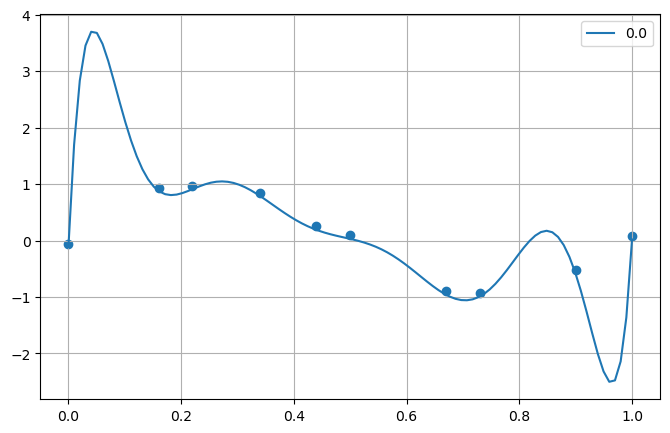

In [40]:
x = np.linspace(0, 1, 100)
y_hat0 = reg0.predict(x.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(X, Y)

ax.plot(x, y_hat0, label='0.0')
plt.legend(loc='best')
plt.grid()

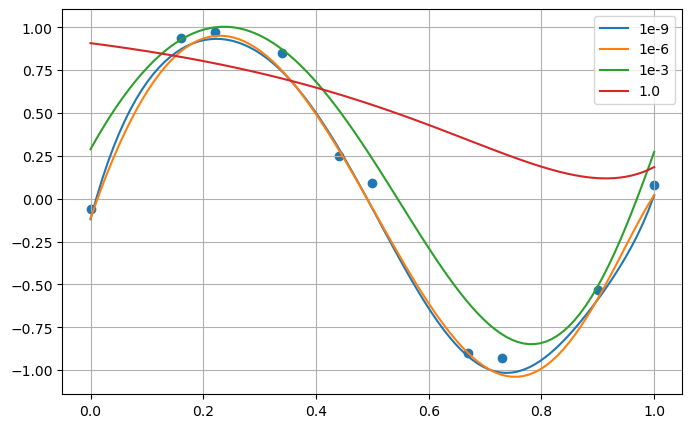

In [41]:
x = np.linspace(0, 1, 100)
y_hat9 = reg9.predict(x.reshape(-1, 1))
y_hat6 = reg6.predict(x.reshape(-1, 1))
y_hat3 = reg3.predict(x.reshape(-1, 1))
y_hat1 = reg1.predict(x.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(X, Y)

ax.plot(x, y_hat9, label='1e-9')
ax.plot(x, y_hat6, label='1e-6')
ax.plot(x, y_hat3, label='1e-3')
ax.plot(x, y_hat1, label='1.0')
plt.legend(loc='best')
plt.grid()

**(2) パラメータの$L_2$ノルム**

学習した4つのモデルのパラメータの$L_2$ノルムを計算し、表示せよ。

In [42]:
np.sqrt(np.dot(w9, w9))

458.6911632564023

In [43]:
np.sqrt(np.dot(w6, w6))

26.730318375808757

In [44]:
np.sqrt(np.dot(w3, w3))

15.944386227325936

In [45]:
np.sqrt(np.dot(w1, w1))

0.8713839481120474

In [46]:
np.sqrt(np.dot(w0, w0))

1136529.185719273

**(3) 検証データに基づく$\alpha$の選択**

例として用いてきた以下の検証データ`X_valid`, `Y_valid`に対して、これまでに学習した4つのモデルの平均二乗残差（MSR）を計算し、正則化のハイパー・パラメータとして最も汎化性能が高いと思われるものを選択せよ。

In [47]:
X_valid = np.array([ 0.05,  0.08,  0.12,  0.16,  0.28,  0.44,  0.47,  0.55,  0.63,  0.99])
Y_valid = np.array([ 0.35,  0.58,  0.68,  0.87,  0.83,  0.45,  0.01, -0.36, -0.83, -0.06])

In [48]:
msr0 = np.mean((Y_valid - reg0.predict(X_valid.reshape(-1, 1))) ** 2)
msr0

1.8877061295105542

In [49]:
msrs = {}
msrs['msr9'] = np.mean((Y_valid - reg9.predict(X_valid.reshape(-1, 1))) ** 2)
msrs['msr6'] = np.mean((Y_valid - reg6.predict(X_valid.reshape(-1, 1))) ** 2)
msrs['msr3'] = np.mean((Y_valid - reg3.predict(X_valid.reshape(-1, 1))) ** 2)
msrs['msr1'] = np.mean((Y_valid - reg1.predict(X_valid.reshape(-1, 1))) ** 2)
msrs

{'msr9': 0.004986230940817709,
 'msr6': 0.005989047062810728,
 'msr3': 0.056974959050025344,
 'msr1': 0.3029800226086913}

In [50]:
min(msrs, key=msrs.get)

'msr9'

In [51]:
min(msrs.values())

0.004986230940817709


---


In [52]:
reg9.score(X_valid.reshape(-1, 1), Y_valid)

0.9819127129644303

In [53]:
reg6.score(X_valid.reshape(-1, 1), Y_valid)

0.9782750509191561

In [54]:
reg3.score(X_valid.reshape(-1, 1), Y_valid)

0.7933263720816272

In [55]:
reg1.score(X_valid.reshape(-1, 1), Y_valid)

-0.09904388705832678

In [56]:
reg0.score(X_valid.reshape(-1, 1), Y_valid)

-5.847553394240175

---

[機械学習帳](https://chokkan.github.io/mlnote/) © Copyright 2020-2022 by [岡崎 直観 (Naoaki Okazaki)](https://www.chokkan.org/). この作品は<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">クリエイティブ・コモンズ 表示 - 非営利 - 改変禁止 4.0 国際 ライセンス</a>の下に提供されています。 <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="クリエイティブ・コモンズ・ライセンス" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/80x15.png" /></a>　ただし、作品中のコードセル部分は<a rel="license" href="https://opensource.org/licenses/MIT">MITライセンス</a>の下に提供されています。